# Exercise 2: Data Processing and Analysis

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    import otter
    grader = otter.Notebook()
except:
    !pip install otter-grader
    import otter
    grader = otter.Notebook()

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [3]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [4]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [5]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = smartwatch['Heart Rate (BPM)'].max()

In [6]:
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [7]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

print(len(outlierHeartRaterows) + len(nullHeartRaterows))

450


In [8]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]

print(heartrateRows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
3      

**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [9]:
HeartRateMean = heartrateRows['Heart Rate (BPM)'].mean()
print(HeartRateMean)


75.13268404820141


In [10]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


print(outlierHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0         75.132684               97.052954   2826.521994   
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
649    2008.0         75.132684               98.356789   2739.171166   
818    3156.0         75.132684                     NaN   7281.778831   
1195   3261.0         75.132684               99.652006   2867.872064   
1391   4621.0         75.132684               96.688083  20577.677290   
1602   4737.0         75.132684               95.095839  16072.283561   
2023      NaN         75.132684               99.032130  17620.765455   
2211   2711.0         75.132684               97.852781   1786.998129   
2212   4020.0         75.132684               95.28

/tmp/ipykernel_57430/936369900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_57430/936369900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


In [11]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = smartwatch_hr['Heart Rate (BPM)'].mean()
print(fullTableHRMean)

75.13268404820141


In [12]:
grader.check('q2')

Question 2 results:
    Question 2 - 1 result:
        ❌ Test case failed
        Trying:
            bool((HeartRateMean == 75.13268404820141) or (HeartRateMean == np.float64(75.13268404820141)))
        Expecting:
            True
        ok
        Trying:
            HeartRateMean == fullTableHRMean
        Expecting:
            True
        **********************************************************************
        Line 5, in Question 2 0
        Failed example:
            HeartRateMean == fullTableHRMean
        Expected:
            True
        Got:
            np.True_

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

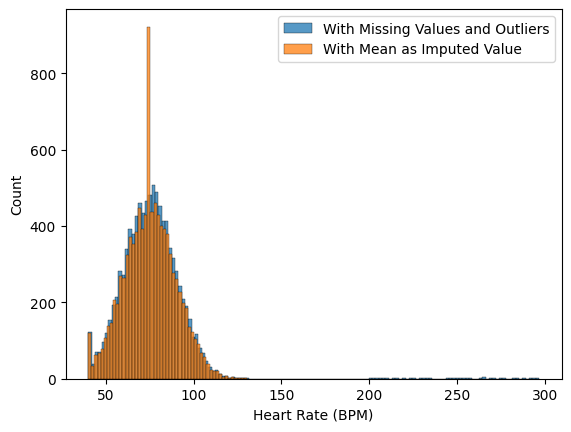

In [13]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: 

It should make the median value the same as the mean value, because you are removing all the outliers and increasing the number of data points at the mean substantially.

In [14]:
## coding cell to check the difference in median values 

print("The old median is", smartwatch['Heart Rate (BPM)'].median(), "while the new median is", smartwatch_hr['Heart Rate (BPM)'].median())


The old median is 75.22060125775644 while the new median is 75.13268404820141


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [15]:
minBloodO2 = smartwatch_hr['Blood Oxygen Level (%)'].min()

maxBloodO2 = smartwatch_hr['Blood Oxygen Level (%)'].max()

meanBloodO2 = smartwatch_hr['Blood Oxygen Level (%)'].mean()

print(minBloodO2, maxBloodO2, meanBloodO2)

90.79120814564097 100.0 97.84158102099076


In [16]:
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

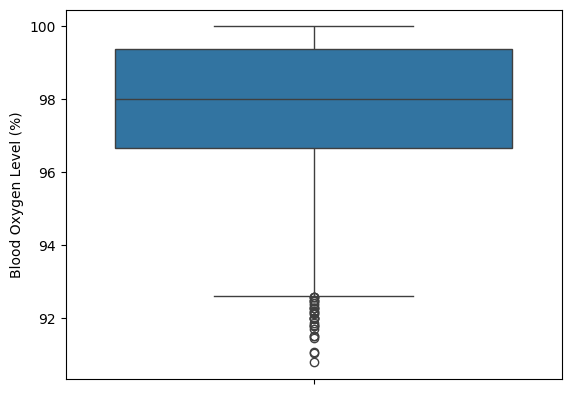

In [17]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: 

I will remove the null values and any values under 94% from the dataset and replace them with the mean of the dataset. We believe removing the low blood oxygen scores is warranted in this case because it's unlikely that a healthy person would actually have that blood oxygen score.

In [18]:
## use this space or additional cells to deal with the missing/outlier values. 

outlierBloodOxygenrows = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'] < 94]
nullBloodOxygenrows = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'].isnull()]
BloodOxygenRows = smartwatch_hr[(~smartwatch_hr['Blood Oxygen Level (%)'].isnull()) & (smartwatch_hr['Blood Oxygen Level (%)'] >= 94)]
outlierBloodOxygenrows['Blood Oxygen Level (%)'] = meanBloodO2
nullBloodOxygenrows['Blood Oxygen Level (%)'] = meanBloodO2

smartwatch_o2 = pd.concat([outlierBloodOxygenrows, nullBloodOxygenrows, BloodOxygenRows])

print(smartwatch_o2)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
7897   3488.0         75.132684               97.841581   1167.050964   
4865   1398.0         75.132684               97.841581  12478.181058   
5075   1353.0         75.132684               97.841581   4427.758338   
6606   1391.0         75.132684               97.841581   1883.356561   
9335   4440.0         75.132684               97.841581  17475.474976   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
7897     6.3843230507913775          Actve            7  
4865   

/tmp/ipykernel_57430/3283842301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierBloodOxygenrows['Blood Oxygen Level (%)'] = meanBloodO2
/tmp/ipykernel_57430/3283842301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullBloodOxygenrows['Blood Oxygen Level (%)'] = meanBloodO2


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [19]:
minSteps = smartwatch_o2['Step Count'].min()

maxSteps = smartwatch_o2['Step Count'].max()

meanSteps = smartwatch_o2['Step Count'].mean()

print(minSteps, maxSteps, meanSteps)

0.9101380609604088 62486.690753464914 6985.685884992229


In [20]:
grader.check('q6')

Question 6 results: All test cases passed!

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: 

If someone ran a marathon, they would on average have walked 52-55,000 steps. So, we will cut off the values of the step count at 55,000 and count everything above that as an outlier and replace it with the mean. We will do the same with the null values. Ideally, we would also make all the values in the table integers, but we don't know the code for that :(

In [21]:
## use this space or additional cells to address the missing or outlier data. 

outlierSteprows = smartwatch_o2[smartwatch_o2['Step Count'] > 55000]
nullSteprows = smartwatch_o2[smartwatch_o2['Step Count'].isnull()]
StepRows = smartwatch_o2[(~smartwatch_o2['Step Count'].isnull()) & (smartwatch_o2['Step Count'] <= 55000)]
outlierSteprows['Step Count'] = meanSteps
nullSteprows['Step Count'] = meanSteps

smartwatch_steps = pd.concat([outlierSteprows, nullSteprows, StepRows])

print(smartwatch_steps)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
540    1399.0         89.969165               97.831652   6985.685885   
1125   3231.0         69.317933               97.586680   6985.685885   
3641   4852.0         73.333370               98.753291   6985.685885   
4018   1636.0         85.356366               95.728989   6985.685885   
7967   3077.0         65.917239               98.585765   6985.685885   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
540       8.382668397997998          Actve            6  
1125   

/tmp/ipykernel_57430/548267540.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierSteprows['Step Count'] = meanSteps
/tmp/ipykernel_57430/548267540.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSteprows['Step Count'] = meanSteps


Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [23]:
minSleep = smartwatch_steps['Sleep Duration (hours)'].min()

minSleep

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [24]:
for i in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(i)  ## first try to see if it can be converted to a number
    except:
        print(i)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [25]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
8642,3476.0,75.132684,99.462778,6985.685885,ERROR,Active,3
1456,2997.0,54.116580,95.631824,6985.685885,ERROR,Active,1
4349,2677.0,73.357223,95.335209,6985.685885,ERROR,Sedentary,1
6992,2105.0,97.477048,94.138582,6985.685885,ERROR,Seddentary,7
9335,4440.0,75.132684,97.841581,17475.474976,ERROR,Active,5
...,...,...,...,...,...,...,...
9901,2269.0,63.369107,96.229029,6656.786482,ERROR,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,ERROR,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,ERROR,Active,1
9943,2961.0,91.834863,96.145378,38831.465057,ERROR,Active,4


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [26]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_57430/2036784971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
8642,3476.0,75.132684,99.462778,6985.685885,NaN,Active,3
1456,2997.0,54.116580,95.631824,6985.685885,NaN,Active,1
4349,2677.0,73.357223,95.335209,6985.685885,NaN,Sedentary,1
6992,2105.0,97.477048,94.138582,6985.685885,NaN,Seddentary,7
9335,4440.0,75.132684,97.841581,17475.474976,NaN,Active,5
...,...,...,...,...,...,...,...
9901,2269.0,63.369107,96.229029,6656.786482,NaN,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,NaN,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,NaN,Active,1
9943,2961.0,91.834863,96.145378,38831.465057,NaN,Active,4


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [27]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
540,1399.0,89.969165,97.831652,6985.685885,8.382668,Actve,6
1125,3231.0,69.317933,97.586680,6985.685885,6.603508,Sedentary,5
3641,4852.0,73.333370,98.753291,6985.685885,6.692178,Active,7
4018,1636.0,85.356366,95.728989,6985.685885,7.269466,Sedentary,1
7967,3077.0,65.917239,98.585765,6985.685885,5.579157,Actve,8
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [28]:
minSleep = smartwatch_steps['Sleep Duration (hours)'].min()

maxSleep = smartwatch_steps['Sleep Duration (hours)'].max()

meanSleep = smartwatch_steps['Sleep Duration (hours)'].mean()

print(minSleep, maxSleep, meanSleep)

-0.1944527906201543 12.140232872862926 6.505462918406444


In [29]:
grader.check('q8')

Question 8 results: All test cases passed!

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: 

Any negative value should be an outlier/error. The max of 12 hours isn't very implausible, so we won't have an upper limit for the outliers. So we will replace negative and NaN values with the mean.

In [30]:
## use this space or additional cells to address the missing or outlier data. 

outlierSleeprows = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] < 0]
nullSleeprows = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'].isnull()]
SleepRows = smartwatch_steps[(~smartwatch_steps['Sleep Duration (hours)'].isnull()) & (smartwatch_steps['Sleep Duration (hours)'] >= 0)]
outlierSleeprows['Sleep Duration (hours)'] = meanSleep
nullSleeprows['Sleep Duration (hours)'] = meanSleep

smartwatch_updated_sleep = pd.concat([outlierSleeprows, nullSleeprows, SleepRows])

print(smartwatch_updated_sleep)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
3366   1608.0         78.832837              100.000000   7122.866517   
8642   3476.0         75.132684               99.462778   6985.685885   
1456   2997.0         54.116580               95.631824   6985.685885   
4349   2677.0         73.357223               95.335209   6985.685885   
5177   2997.0         70.484333               97.615592   6985.685885   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

      Sleep Duration (hours) Activity Level Stress Level  
3366                6.505463      Sedentary           10  
8642 

/tmp/ipykernel_57430/3869208448.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierSleeprows['Sleep Duration (hours)'] = meanSleep
/tmp/ipykernel_57430/3869208448.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSleeprows['Sleep Duration (hours)'] = meanSleep


We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [31]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

Very High
nan


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: 
We will change the value of the 'Very High' scores to a 9, because it is a "very high" stress value, but it's not quite the highest.

While the output above shows there is also a value nan, subsequent testing showed isolating that value gave an empty data frame, so I ignored it.

In [32]:
## cell to deal with 'Very High' value

errorStressTable = smartwatch_updated_sleep[smartwatch_updated_sleep['Stress Level'] == 'Very High']
errorStressTable['Stress Level'] = np.nan
smartwatch_stress1 = pd.concat([smartwatch_updated_sleep, errorStressTable])

nullStressrows = smartwatch_stress1[smartwatch_stress1['Stress Level'].isnull()]
StressRows = smartwatch_stress1[(~smartwatch_stress1['Stress Level'].isnull())]
nullStressrows['Stress Level'] = 9

smartwatch_stress = pd.concat([nullStressrows, StressRows])

print(smartwatch_stress)


      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
3919      NaN         46.812987               95.234249   7893.183565   
5596   3871.0         71.320880               99.228302   3498.719211   
6127   4821.0         89.024555               96.138871   4261.951634   
6165   4601.0         79.244143               96.013915   2311.324740   
7383   1871.0         61.256883               97.491386   5085.035828   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

      Sleep Duration (hours) Activity Level Stress Level  
3919                6.505463  Highly_Active            9  
5596 

/tmp/ipykernel_57430/1016625749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorStressTable['Stress Level'] = np.nan
/tmp/ipykernel_57430/1016625749.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullStressrows['Stress Level'] = 9


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [33]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [34]:
## Highly Active 
highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly Active') | (smartwatch_stress['Activity Level'] == 'Highly_Active')]  ## Pull out rows for two unique values matching highly active
highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 


## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Active') | (smartwatch_stress['Activity Level'] == 'Highly_Actve')]
active['Activity Level'] = 'Active'
active['NumActivity'] = 2

## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Seddentary') | (smartwatch_stress['Activity Level'] == 'Sedentary')]
sedentary['Activity Level'] = 'Sedentary'
sedentary['NumActivity'] = 3


final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
final_table

/tmp/ipykernel_57430/2762359455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
/tmp/ipykernel_57430/2762359455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_57430/2762359455.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity
3919,NaN,46.812987,95.234249,7893.183565,6.505463,Highly Active,9,1.0
7383,1871.0,61.256883,97.491386,5085.035828,6.505463,Highly Active,9,1.0
8774,4870.0,52.634964,97.971538,15906.886529,6.505463,Highly Active,9,1.0
8888,4280.0,54.477481,97.841581,6509.442898,2.557724,Highly Active,9,1.0
4949,2572.0,75.710617,97.841581,3397.868672,6.765079,Highly Active,9,1.0
...,...,...,...,...,...,...,...,...
9842,2108.0,71.152455,98.585987,1480.777008,8.379498,NaN,9,NaN
9845,4203.0,91.417098,95.383875,1238.788704,6.226965,NaN,7,NaN
9867,2674.0,69.075313,99.067026,2759.328767,4.919706,NaN,5,NaN
9898,1409.0,79.941705,98.716816,619.353083,8.143443,NaN,8,NaN


Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [35]:
final_table.isnull().sum()

User ID                   171
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)      0
Activity Level            200
Stress Level                0
NumActivity               200
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [36]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8421 entries, 3919 to 9991
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 8250 non-null   float64
 1   Heart Rate (BPM)        8421 non-null   float64
 2   Blood Oxygen Level (%)  8421 non-null   float64
 3   Step Count              8421 non-null   float64
 4   Sleep Duration (hours)  8421 non-null   float64
 5   Activity Level          8221 non-null   object 
 6   Stress Level            8421 non-null   object 
 7   NumActivity             8221 non-null   float64
dtypes: float64(6), object(2)
memory usage: 592.1+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER:

There seem to be heavy lines of data at the mean for Blood Oxygen and Heart Rate, because of the manipulation of the data that we did. Otherwise, the data does seem to be centered around the intersection of the two means and radiate outward.

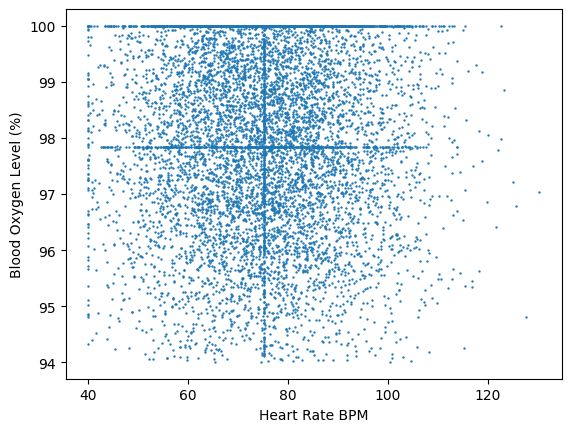

In [37]:
plt.xlabel("Heart Rate BPM")
plt.ylabel("Blood Oxygen Level (%)")
plt.scatter(final_table['Heart Rate (BPM)'], final_table['Blood Oxygen Level (%)'], s = .5)

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER:

The variation/range in the data is a lot larger than in the above scatter plot. The data looks like it is more dense, but that could be because of the zoomed out plot size.

In [38]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

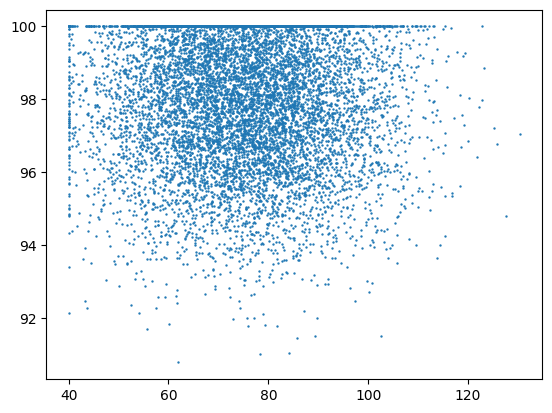

In [39]:
plt.scatter(nanTable['Heart Rate (BPM)'], nanTable['Blood Oxygen Level (%)'], s = .5)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<Axes: ylabel='Activity Level'>

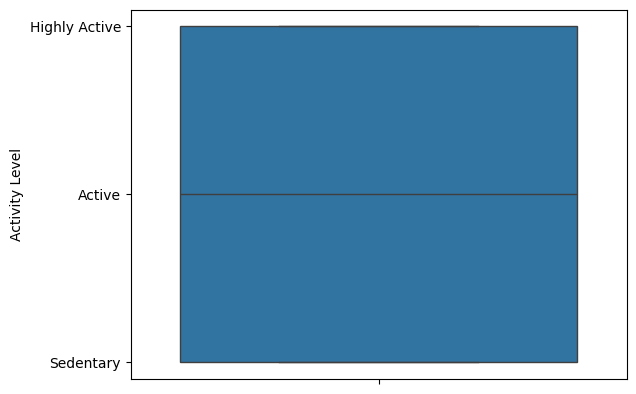

In [40]:
## Visualization 

sns.boxplot(final_table['Activity Level'])

In [42]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = final_table[final_table['Activity Level'] == 'Sedentary']  ## sedentary rows
act = final_table[final_table['Activity Level'] == 'Active'] ## active rows
hact = final_table[final_table['Activity Level'] == 'Highly Active'] ## highly active rows 

stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.857, p-value: 0.425


Is there significant difference between the groups' step counts?  

ANSWER:

Yes, there is a significant difference between the groups' step counts. The p-value is 0.425, which is less than 0.05 so it is unlikely that the variation is due to chance. 

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER:

We would have to be transparent about the level of manipulation required to create the final dataset, as the choices we made impact how people should interpret the data. I think the results of the dataset reinforce the idea that people have to fall within "normal" ranges, and that could be problematic. We should also include descriptions of who was included in the dataset, possibly with breakdowns by gender, ethnicity, race, and other factors that might influence the mean values of the dataset.